Below a repeat of the working simple split operator method

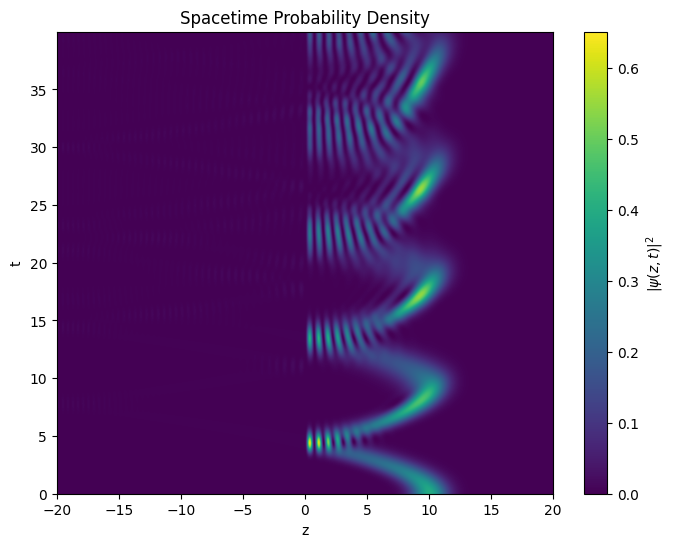

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# ------------------
# 1) Constants & Setup
# ------------------
hbar = 1.0
m = 1.0
g = 1.0

# ------------------
# 2) Potential Functions
# ------------------
def gravity_potential(z):
    return m * g * z

def delta_barrier(z, z0=0.0, alpha=5.0, dz=0.01):
    """Approximate a delta potential by a very narrow Gaussian."""
    sigma = dz / 2
    return alpha * np.exp(-((z - z0)**2)/(2*sigma**2)) / (np.sqrt(2*np.pi)*sigma)

def gaussian_barrier(z, z0=0.0, V0=5.0, sigma=0.5):
    """A Gaussian potential barrier centered at z0."""
    return V0 * np.exp(-(z - z0)**2/(2*sigma**2))

# ------------------
# 3) Initial Wavefunction
# ------------------
def initial_wavefunction(z, z0=10.0, p0=0.0, sigma0=1.0):
    """Gaussian wave packet with center z0, momentum p0, width sigma0."""
    norm_factor = 1.0 / (2.0 * np.pi * sigma0**2)**0.25
    return norm_factor \
           * np.exp(-(z - z0)**2 / (4.0 * sigma0**2)) \
           * np.exp(1j * p0 * (z - z0) / hbar)

# ------------------
# 4) Split-Operator Step
# ------------------
def split_operator_step(psi, V, kinetic_factor, dt):
    """Perform one split-operator time step: half potential -> full kinetic -> half potential."""
    # half-step in potential
    psi *= np.exp(-0.5j * V * dt / hbar)

    # full-step in kinetic (momentum) space
    psi_k = np.fft.fft(psi)
    psi_k *= kinetic_factor
    psi = np.fft.ifft(psi_k)

    # another half-step in potential
    psi *= np.exp(-0.5j * V * dt / hbar)
    return psi

# ------------------
# 5) Simulation Function
# ------------------
def simulate_n(barrier_type='delta', 
               n_steps=200, 
               dt=0.01, 
               x_min=-20, x_max=20, Nx=512,
               barrier_params=None,
               z0_packet=10.0, p0_packet=0.0):
    """
    Simulate the time evolution for n_steps using split-operator, storing |psi(z,t)|^2 each step.
    Return (z_array, t_vals, prob_arr), where prob_arr[step, :] = |psi(z, t_step)|^2.
    """
    if barrier_params is None:
        barrier_params = {}

    # Spatial grid
    z_array = np.linspace(x_min, x_max, Nx)
    dz = z_array[1] - z_array[0]

    # Barrier potential
    if barrier_type == 'delta':
        V_bar = delta_barrier(z_array, **barrier_params, dz=dz)
    else:
        V_bar = gaussian_barrier(z_array, **barrier_params)

    # Total potential = gravity + barrier
    V_total = gravity_potential(z_array) + V_bar

    # Kinetic factor in momentum space
    k_array = 2.0 * np.pi * np.fft.fftfreq(Nx, d=dz)
    kinetic_factor = np.exp(-0.5j * (hbar * k_array**2 / (2*m)) * (dt / hbar) * 2)

    # Initial wavefunction
    psi = initial_wavefunction(z_array, z0=z0_packet, p0=p0_packet, sigma0=1.0)

    # For storing probability
    prob_arr = np.zeros((n_steps, Nx), dtype=np.float64)

    # Time evolution
    for step in range(n_steps):
        # record |psi|^2 at this step
        prob_arr[step] = np.abs(psi)**2
        # step forward
        psi = split_operator_step(psi, V_total, kinetic_factor, dt)

    # time array
    t_vals = np.arange(n_steps) * dt
    return z_array, t_vals, prob_arr

# ------------------
# 6) 2D Heatmap Plot
# ------------------
def plot_spacetime(prob_arr, z_array, t_vals):
    """
    Produce a heatmap of |psi(z,t)|^2 over space (x-axis) and time (y-axis).
    
    prob_arr : shape (N_time, N_space)
               prob_arr[i, j] = |psi(z_j, t_i)|^2
    z_array  : spatial grid, shape (N_space,)
    t_vals   : time array, shape (N_time,)
    """
    z_min, z_max = z_array[0], z_array[-1]
    t_min, t_max = t_vals[0], t_vals[-1]

    plt.figure(figsize=(8,6))
    plt.imshow(
        prob_arr,
        extent=[z_min, z_max, t_min, t_max],
        aspect='auto',
        cmap='viridis',
        origin='lower'
    )
    plt.colorbar(label=r'$|\psi(z,t)|^2$')
    plt.xlabel('z')
    plt.ylabel('t')
    plt.title('Spacetime Probability Density')
    plt.show()

# ------------------
# 7) Main Execution
# ------------------
def main():
    # Example usage: delta barrier
    barrier_params_delta = {'z0': 0.0, 'alpha': 15.0}
    z_array, t_vals, prob_arr = simulate_n(
        barrier_type='delta',
        n_steps=40000,
        dt=0.001,
        x_min=-20, x_max=20, Nx=512,
        barrier_params=barrier_params_delta,
        z0_packet=10.0,
        p0_packet=0.0
    )
    
    # Now plot the spacetime density
    plot_spacetime(prob_arr, z_array, t_vals)

# If you want to run it directly here:b
if __name__ == "__main__":
    main()


p0 = 0.50, Transmission = 0.099
p0 = 2.58, Transmission = 0.611
p0 = 4.66, Transmission = 0.185
p0 = 6.74, Transmission = 0.665
p0 = 8.82, Transmission = 0.230
p0 = 10.89, Transmission = 0.583
p0 = 12.97, Transmission = 0.322
p0 = 15.05, Transmission = 0.472
p0 = 17.13, Transmission = 0.423
p0 = 19.21, Transmission = 0.363
p0 = 21.29, Transmission = 0.538
p0 = 23.37, Transmission = 0.266
p0 = 25.45, Transmission = 0.644
p0 = 27.53, Transmission = 0.180
p0 = 29.61, Transmission = 0.738
p0 = 31.68, Transmission = 0.125
p0 = 33.76, Transmission = 0.812
p0 = 35.84, Transmission = 0.112
p0 = 37.92, Transmission = 0.722
p0 = 40.00, Transmission = 0.705


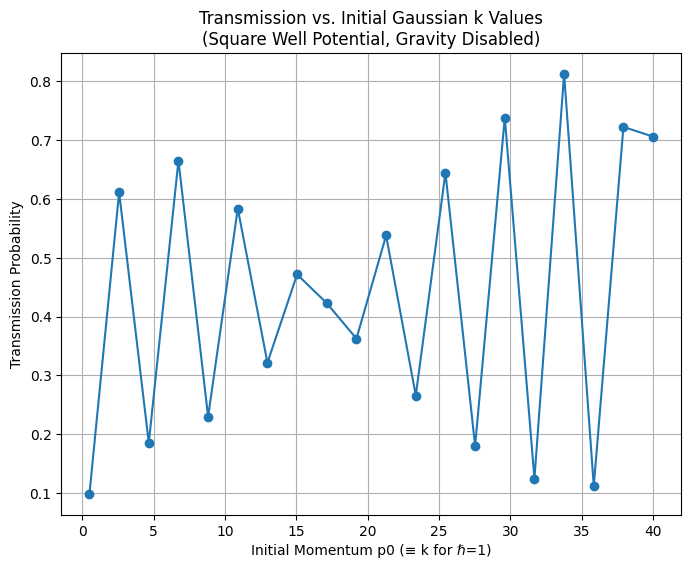

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------
# 1) Constants & Setup
# ------------------
hbar = 1.0
m = 1.0
g = 0.0  # Disable gravity

# ------------------
# 2) Potential Functions
# ------------------
def gravity_potential(z):
    return m * g * z  # Will be zero since g = 0.0

def delta_barrier(z, z0=0.0, alpha=5.0, dz=0.01):
    """Approximate a delta potential by a very narrow Gaussian."""
    sigma = dz / 2
    return alpha * np.exp(-((z - z0)**2) / (2 * sigma**2)) / (np.sqrt(2*np.pi) * sigma)

def gaussian_barrier(z, z0=0.0, V0=5.0, sigma=0.5):
    """A Gaussian potential barrier centered at z0."""
    return V0 * np.exp(-(z - z0)**2 / (2 * sigma**2))

def square_well(z, z0=0.0, width=1.0, V0=5.0):
    """
    Square well potential centered at z0.
    Returns -V0 for |z - z0| < width/2, and 0 outside.
    """
    return -V0 * ((z >= (z0 - width/2)) & (z <= (z0 + width/2))).astype(float)

# ------------------
# 3) Initial Wavefunction
# ------------------
def initial_wavefunction(z, z0=-10.0, p0=0.0, sigma0=1.0):
    """Gaussian wave packet starting on the left with momentum p0.
       For ℏ=1, p0 is equivalent to the k value."""
    norm_factor = 1.0 / (2.0 * np.pi * sigma0**2)**0.25
    return norm_factor * np.exp(-(z - z0)**2 / (4.0 * sigma0**2)) * np.exp(1j * p0 * (z - z0) / hbar)

# ------------------
# 4) Split-Operator Step
# ------------------
def split_operator_step(psi, V, kinetic_factor, dt):
    """Perform one split-operator time step: half potential -> full kinetic -> half potential."""
    psi *= np.exp(-0.5j * V * dt / hbar)
    psi_k = np.fft.fft(psi)
    psi_k *= kinetic_factor
    psi = np.fft.ifft(psi_k)
    psi *= np.exp(-0.5j * V * dt / hbar)
    return psi

# ------------------
# 5) Simulation Function
# ------------------
def simulate_n(barrier_type='square_well', 
               n_steps=2000, 
               dt=0.005, 
               x_min=-20, x_max=20, Nx=512,
               barrier_params=None,
               z0_packet=-10.0, p0_packet=0.0):
    """
    Simulate time evolution using split-operator method.
    Returns (z_array, t_vals, prob_arr) where prob_arr[step, :] = |psi(z, t_step)|^2.
    """
    if barrier_params is None:
        barrier_params = {}

    # Spatial grid
    z_array = np.linspace(x_min, x_max, Nx)
    dz = z_array[1] - z_array[0]

    # Set up potential; note that with g = 0 gravity is off.
    if barrier_type == 'square_well':
        V_bar = square_well(z_array, **barrier_params)
        V_total = V_bar  # Only the square well potential
    elif barrier_type == 'delta':
        V_bar = delta_barrier(z_array, **barrier_params, dz=dz)
        V_total = gravity_potential(z_array) + V_bar
    else:  # Use gaussian_barrier as default
        V_bar = gaussian_barrier(z_array, **barrier_params)
        V_total = gravity_potential(z_array) + V_bar

    # Kinetic factor in momentum space
    k_array = 2.0 * np.pi * np.fft.fftfreq(Nx, d=dz)
    kinetic_factor = np.exp(-0.5j * (hbar * k_array**2 / (2*m)) * (dt / hbar) * 2)

    # Initial wavefunction
    psi = initial_wavefunction(z_array, z0=z0_packet, p0=p0_packet, sigma0=1.0)

    # For storing probability densities
    prob_arr = np.zeros((n_steps, Nx), dtype=np.float64)

    # Time evolution loop
    for step in range(n_steps):
        prob_arr[step] = np.abs(psi)**2
        psi = split_operator_step(psi, V_total, kinetic_factor, dt)

    t_vals = np.arange(n_steps) * dt
    return z_array, t_vals, prob_arr

# ------------------
# 6) Transmission Calculation
# ------------------
def compute_transmission(prob_arr, z_array, threshold=2.0):
    """
    Compute the transmission probability from the final probability density.
    Here we integrate the probability density for z > threshold.
    """
    dz = z_array[1] - z_array[0]
    transmitted_prob = np.sum(prob_arr[-1][z_array > threshold]) * dz
    return transmitted_prob

# ------------------
# 7) Main Function: Transmission vs. Initial Momentum
# ------------------
def main_transmission():
    # Simulation parameters
    n_steps = 2000      # Number of time steps; adjust to ensure the packet has time to reach the transmission region
    dt = 0.005          # Time step size
    x_min, x_max, Nx = -20, 20, 512

    # Square well parameters: centered at 0, width 2, depth 5 (i.e. potential = -5 in the well)
    barrier_params = {'z0': 0.0, 'width': 2.0, 'V0': 5.0}
    
    # Define a range of initial momenta (p0) values.
    # (For ℏ = 1, p0 is equivalent to the wave number k.)
    p0_values = np.linspace(0.5, 40.0, 20)
    transmission_vals = []

    # Loop over each initial momentum
    for p0 in p0_values:
        # Simulate evolution for the given p0
        z_array, t_vals, prob_arr = simulate_n(
            barrier_type='square_well',
            n_steps=n_steps,
            dt=dt,
            x_min=x_min, x_max=x_max, Nx=Nx,
            barrier_params=barrier_params,
            z0_packet=-10.0,  # Start on the left side of the square well
            p0_packet=p0
        )
        # Compute transmission (we choose threshold = 2.0, to be safely right of the well)
        T = compute_transmission(prob_arr, z_array, threshold=2.0)
        transmission_vals.append(T)
        print(f"p0 = {p0:.2f}, Transmission = {T:.3f}")

    # Plot transmission versus initial momentum (k value)
    plt.figure(figsize=(8,6))
    plt.plot(p0_values, transmission_vals, marker='o')
    plt.xlabel('Initial Momentum p0 (≡ k for ℏ=1)')
    plt.ylabel('Transmission Probability')
    plt.title('Transmission vs. Initial Gaussian k Values\n(Square Well Potential, Gravity Disabled)')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main_transmission()


scipy.integrate.simps not found; using np.trapz as a fallback.


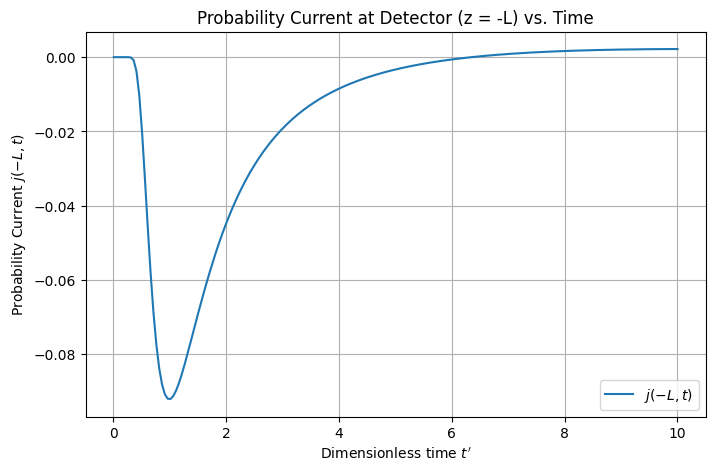

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Try to import simps from scipy.integrate; if unavailable, fall back to np.trapz
try:
    from scipy.integrate import simps
except ImportError:
    print("scipy.integrate.simps not found; using np.trapz as a fallback.")
    simps = np.trapz

# Set physical constants and parameters (in our chosen units: ℏ=1, m=1, g=1)
hbar = 1.0
m = 1.0
g = 1.0

# Define natural (dimensionful) scales:
l0 = (hbar**2 / (2 * m**2 * g))**(1/3)  # l0^3 = hbar^2/(2 m^2 g)
E0 = m * g * l0                        # E0 = m g l0

# Detector location in original units and its dimensionless coordinate
L = 1.0                # detector at z = -L (i.e. on the negative side)
z_det_dimless = -L / l0  # dimensionless detector position

# Initial wavepacket parameters (in original units, then converted to dimensionless)
z0 = 15               # initial position (z0 > 0)
z0_dimless = z0 / l0   # dimensionless center for the initial wavefunction
sigma = 0.1            # width (in dimensionless units)

# Normalization for the Gaussian initial state in dimensionless units
N = 1.0 / (np.pi**0.25 * np.sqrt(sigma))

def phi_initial(zp):
    """
    Initial wavefunction in dimensionless variable (zp) 
    as a normalized Gaussian centered at z0_dimless with width sigma.
    """
    return N * np.exp( - ( (zp - z0_dimless)**2 )/(2 * sigma**2) )

def K0(z, t, zp):
    """
    Free-fall propagator in dimensionless variables.
    z, zp: dimensionless positions
    t: dimensionless time (t' = E0*t/hbar)
    
    K0(z, t; zp, 0) = (1/sqrt(4π i t)) exp{ 
      i/(4t) [z - zp + t^2/2]^2 - i t (z+zp)/2 - i t^3/12 }
    """
    prefac = 1.0/np.sqrt(4 * np.pi * 1j * t)
    phase = 1j * ((z - zp + 0.5*t**2)**2)/(4*t) - 1j * (t/2.0)*(z+zp) - 1j * t**3/12.0
    return prefac * np.exp(phase)

def dK0dz(z, t, zp):
    """
    Derivative of the free-fall propagator with respect to z.
    d/dz K0(z,t;zp,0) = K0(z,t;zp,0) * [ i*(z - zp + t^2/2) / (2t) ]
    """
    return K0(z, t, zp) * (1j * (z - zp + 0.5*t**2))/(2*t)

def phi_at_z(z, t, zp_array):
    """
    Compute the evolved wavefunction phi(z,t) by integrating over the initial positions.
    Uses Simpson's rule (or np.trapz as a fallback) for integration.
    zp_array: grid in dimensionless space.
    """
    integrand = K0(z, t, zp_array) * phi_initial(zp_array)
    return simps(integrand, zp_array)

def dphi_dz_at_z(z, t, zp_array):
    """
    Compute the spatial derivative d/dz phi(z,t) by integrating dK0dz * phi_initial.
    """
    integrand = dK0dz(z, t, zp_array) * phi_initial(zp_array)
    return simps(integrand, zp_array)

# Prepare a grid for the integration over initial positions.
num_zp = 2000
zp_min = z0_dimless - 10 * sigma
zp_max = z0_dimless + 10 * sigma
zp_array = np.linspace(zp_min, zp_max, num_zp)

# Time grid (in dimensionless time t')
t_min = 0.01   # start a little after t=0 to avoid singularities
t_max = 10.0
num_t = 200
t_array = np.linspace(t_min, t_max, num_t)

# Array to store the probability current at the detector as a function of time.
j_array = np.zeros_like(t_array, dtype=np.float64)

# In our units the probability current at the detector is
# j(-L,t) = (E0/m) * Im{ phi*(z_det_dimless, t) * (d/dz phi(z_det_dimless,t) ) }
for i, t in enumerate(t_array):
    phi_val = phi_at_z(z_det_dimless, t, zp_array)
    dphi_val = dphi_dz_at_z(z_det_dimless, t, zp_array)
    j_array[i] = (E0/m) * np.imag(np.conjugate(phi_val) * dphi_val)

# Plot the probability current vs. dimensionless time t'
plt.figure(figsize=(8,5))
plt.plot(t_array, j_array, label=r'$j(-L,t)$')
plt.xlabel(r"Dimensionless time $t'$")
plt.ylabel("Probability Current $j(-L,t)$")
plt.title("Probability Current at Detector (z = -L) vs. Time")
plt.legend()
plt.grid(True)
plt.show()
